In [2]:
import pandas as pd

#1. A,B,and C

#Loading the dataset into a data frame variable called dataFrame
dataFrame = pd.read_csv('uber.csv')
#Testing if it is well loaded
print(dataFrame.head())
#Checking the column names and data types
print(dataFrame.dtypes)
#Checking the rows and columns
print(dataFrame.shape)
#Checking how many null cells there are
print(dataFrame.isnull().sum())
#Checking how many duplicates there are
print(dataFrame.duplicated().sum())
#Checking the statistical standpoint of the dataset
print(dataFrame.describe())

   Unnamed: 0                            key  fare_amount   
0    24238194    2015-05-07 19:52:06.0000003          7.5  \
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude   
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354  \
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [3]:
#1.D & E

"""
I found 1 duplicate column and only have 2 missing values in 2 columns(dropoff longitude & latitude) from 200,000 values 
I think it makes more sense to just delete the missing values, because losing 2 rows can not affect much.
"""
dataFrame.dropna(inplace=True)
dataFrame.drop('key', axis=1, inplace=True) #Already dropped

#Checking if the 2 missing values and duplicate 'Key' column where deleted successfully
print(dataFrame.isna().sum())
print(dataFrame.columns) 

"""
Checking the columns I noticed that dates don't have the right data type. To fix that I am going to change the pickup date
columns' datatypes to Pandas datatype: to_datetime
"""
dataFrame['pickup_datetime'] = pd.to_datetime(dataFrame['pickup_datetime'])

"""
In the first question when I run the statistical standpoint of the uber dataset: 
1.I notice the minimum fare is negative, to my thinking this is wrong because money can not be negative. 
2.I notice that the passenger count's minimum is 0 which doesn't make sense because atleast 1 person is
required to hail the uber.

Conclusion: I fixed this by using the boolean mask to filter those odd values out.
"""

dataFrame = dataFrame[(dataFrame['fare_amount'] > 0) & (dataFrame['passenger_count'] >= 1)]
#Checking if the minimum values have changed for both columns to reasonable values
print(dataFrame.describe())
#Exporting the cleaned dataset into a new CSV file.
dataFrame.to_csv('clean_uber.csv', index=False)

Unnamed: 0           0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64
Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude   
count  1.992690e+05  199269.000000     199269.000000    199269.000000  \
mean   2.771565e+07      11.369419        -72.530120        39.937186   
std    1.601415e+07       9.905852         11.434205         7.723661   
min    1.000000e+00       0.010000      -1340.648410       -74.015515   
25%    1.382629e+07       6.000000        -73.992065        40.734796   
50%    2.775601e+07       8.500000        -73.981825        40.752584   
75%    4.155969e+07      12.500000        -73.967160        40.767157   
max    5.542357e+07     499.

In [4]:
#2.A

"""
After using the describe() method I already found the mean, standard deviation, quartiles, and median.
I am missing the mode so I will calculate it individually for all columns
"""

#Finding the mean, standard deviation, quartiles, and median.
print(dataFrame.describe())
#Finding the mode for each column
print(dataFrame['Unnamed: 0'].mode())
print(dataFrame['dropoff_latitude'].mode())
print(dataFrame['dropoff_longitude'].mode())
print(dataFrame['fare_amount'].mode())
print(dataFrame['passenger_count'].mode())
print(dataFrame['pickup_datetime'].mode())
print(dataFrame['pickup_latitude'].mode())
print(dataFrame['pickup_longitude'].mode())

         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude   
count  1.992690e+05  199269.000000     199269.000000    199269.000000  \
mean   2.771565e+07      11.369419        -72.530120        39.937186   
std    1.601415e+07       9.905852         11.434205         7.723661   
min    1.000000e+00       0.010000      -1340.648410       -74.015515   
25%    1.382629e+07       6.000000        -73.992065        40.734796   
50%    2.775601e+07       8.500000        -73.981825        40.752584   
75%    4.155969e+07      12.500000        -73.967160        40.767157   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199269.000000     199269.000000    199269.000000  
mean          -72.528149         39.925354         1.690474  
std            13.119015          6.794146         1.384784  
min         -3356.666300       -881.985513         1.000000  
25%           -73.991410        

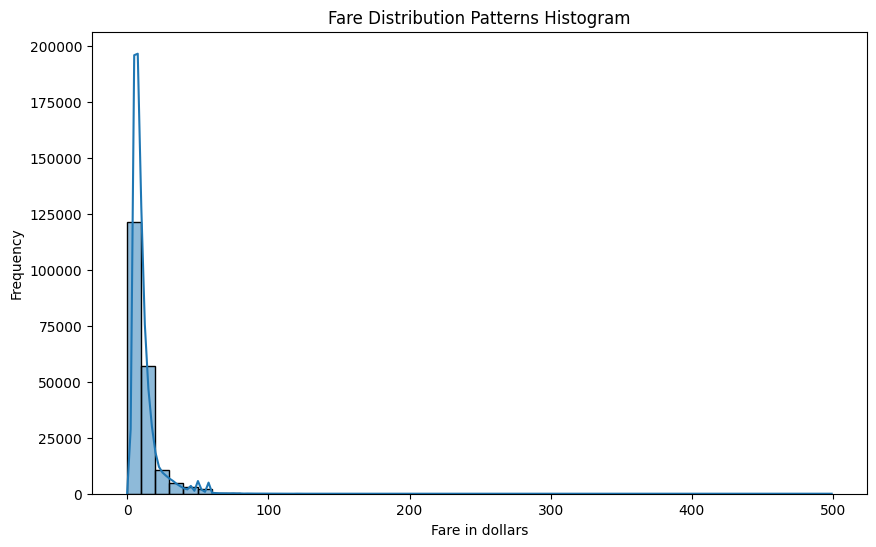

In [5]:
#2.B

import matplotlib.pyplot as plot
import seaborn as sns

#Creating a histogram for the fare amount
plot.figure(figsize=(10,6))
sns.histplot(dataFrame['fare_amount'], bins=50, kde=True)
plot.title('Fare Distribution Patterns Histogram')
plot.xlabel('Fare in dollars')
plot.ylabel('Frequency')
plot.show()

   distance
0  1.683323
1  2.457590
2  5.036377
3  1.661683
4  4.475450


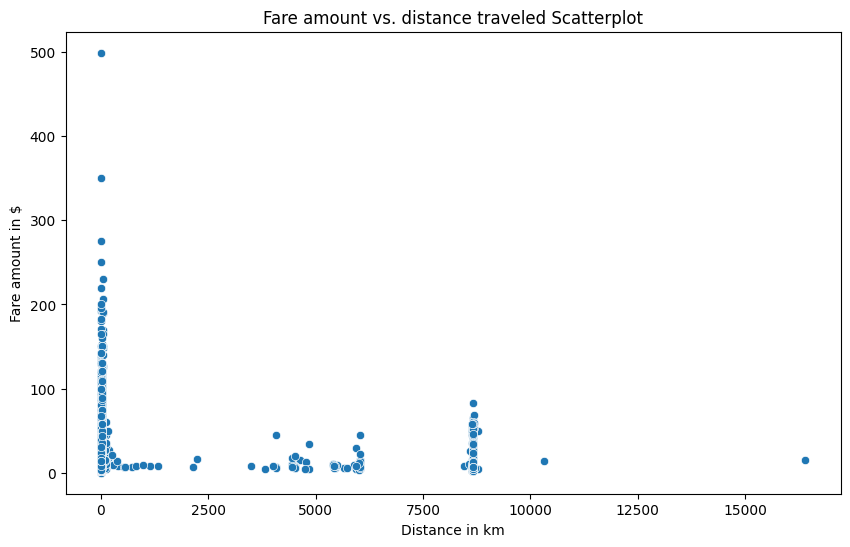

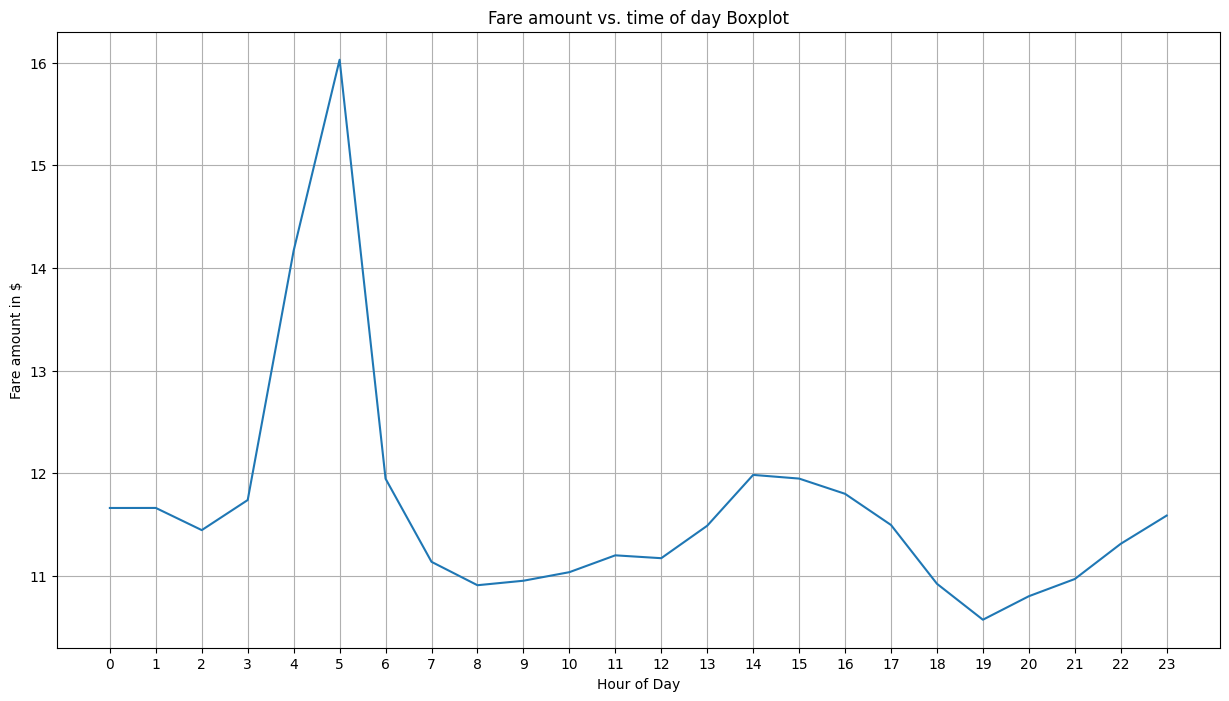

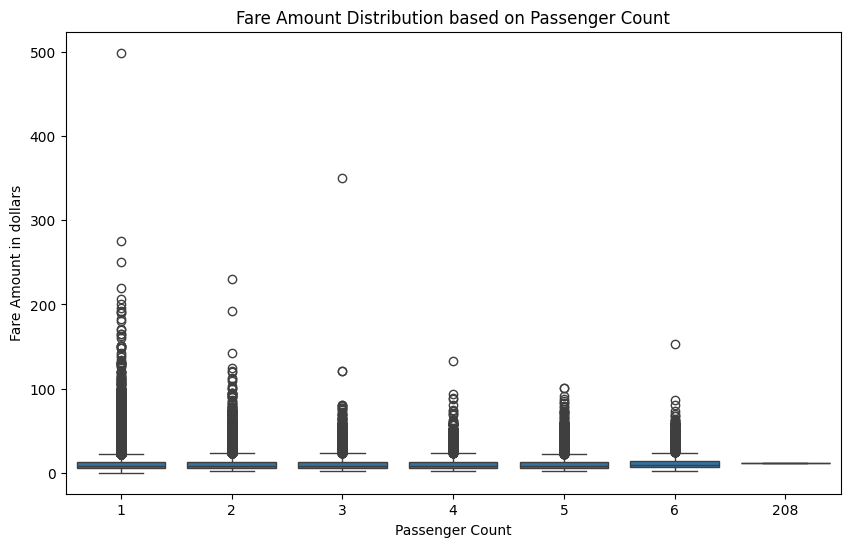

In [19]:
#2.C and 3.A

import numpy as np

"""
I chose the scatterplot & lineplot for 2.C because based on my research they're the best for relationship comparison. 
Distance = I need to substract the ending location from the starting location. The only possible way was by creating
a function with the haversine formula for longitudes and latitudes distance calculations(km) then I added the distance 
column to the dataset.
"""

#Function with formula for calculating distance between latitudes & longitudes
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    distance_longitude = lon2 - lon1
    distance_latitude = lat2 - lat1
    a = np.sin(distance_latitude/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(distance_longitude/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 
    return c * r

#Adding distance as column to my data frame
dataFrame['distance'] = haversine(dataFrame['pickup_longitude'], dataFrame['pickup_latitude'], dataFrame['dropoff_longitude'], 
dataFrame['dropoff_latitude'])
#Checking if the new column was created successfully
print(dataFrame[['distance']].head())

#Creating a scatter plot diagram for analyzing the relationship between distance and fare amount
plot.figure(figsize=(10,6))
sns.scatterplot(x='distance', y='fare_amount', data = dataFrame)
plot.title('Fare amount vs. distance traveled Scatterplot')
plot.xlabel('Distance in km')
plot.ylabel('Fare amount in $')
plot.show()

#Calculating the time of day. I had already fixed the data type problem during cleaning. 
# So it is easy to extract day of the week, hour, and month and create them as
dataFrame['hour'] = dataFrame['pickup_datetime'].dt.hour
dataFrame['day'] = dataFrame['pickup_datetime'].dt.day_name()
dataFrame['month'] = dataFrame['pickup_datetime'].dt.month_name()
dataFrame.head()

#Creating the lineplot diagram for analyzing time and fare amount relationship
meanHourlyFare = dataFrame.groupby('hour')['fare_amount'].mean().reset_index()

plot.figure(figsize=(15,8))
sns.lineplot(x='hour', y='fare_amount', data = meanHourlyFare)
plot.title('Fare amount vs. time of day Boxplot')
plot.xlabel('Hour of Day')
plot.ylabel('Fare amount in $')
plot.xticks(range(0,24))
plot.grid(True)
plot.show()

#Creating a boxplot diagram for analyzing passenger count and fare. I think it is also relevant to see if the uber
#Gives discounts to groups of people leading to varying fares that is why I chose passenger_count
plot.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=dataFrame)
plot.title('Fare Amount Distribution based on Passenger Count')
plot.xlabel('Passenger Count')
plot.ylabel('Fare Amount in dollars')
plot.show()

In [20]:

#3. A,B & C

#Defining a function that will categorize hours as either peak or off-peak
def PeakChecker(hour):
    if (hour >= 7 and hour <= 10) or (hour >= 16 and hour <= 19):
        return 'Peak'
    else:
        return 'Off-Peak'

#Applying the function to the hour column to create the peak_offPeak column
dataFrame['peak_offPeak'] = dataFrame['hour'].apply(PeakChecker)
#Checking if the new column was added successfully
print(dataFrame[['hour', 'peak_offPeak']].head())

#Select the categorical columns to encode them
catCol = ['day', 'month', 'peak_offPeak']
#Applying one-hot encoding method to create the encoded columns
dataFrame = pd.get_dummies(dataFrame, columns=catCol, drop_first=True)
#Checking if the new colums were added successfully
dataFrame.head()

#Exporting the recently cleaned dataset into a new CSV file.
dataFrame.to_csv('pbi_uber.csv', index=False)

   hour peak_offPeak
0    19         Peak
1    20     Off-Peak
2    21     Off-Peak
3     8         Peak
4    17         Peak


In [21]:
#Reclaiming the day of the week and month columns that got lost after encoding
df = pd.read_csv('clean_uber.csv')
df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month_name()
df['peak_offPeak'] = df['hour'].apply(PeakChecker)
df.head()
df.to_csv('uber_powerbi.csv', index=False)
